# FEATURE ENGINEERING : FILLNA, ENCODE, BINNING, SCALING, REGULARIZATION

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 300)
%matplotlib inline

In [2]:
print('pandas version:', pd.__version__,'per December 2020')
print('matplotlib version:', matplotlib.__version__,'per December 2020')
print('seaborn version:', sns.__version__,'per December 2020')

pandas version: 1.1.0 per December 2020
matplotlib version: 3.1.3 per December 2020
seaborn version: 0.10.0 per December 2020


In [3]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai') # untuk mengubah tema visualisasi data

# READ DATA

In [24]:
cereal = pd.read_csv('./Downloads/cereal.csv') # membaca file csv

In [25]:
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,FDA_25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,FDA_0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,FDA_25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,FDA_25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,FDA_25,3,1.0,0.75,34.384843


In [26]:
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     object 
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(5), object(4)
memory usage: 9.8+ KB


# FILLNA WITH PANDAS

In [27]:
filler = {"carbo" : cereal.carbo.mean(),
         "sugars" : cereal.sugars.mean(),
         "potass" : cereal.potass.mean()}

In [28]:
cereal.fillna(filler,inplace=True)

In [29]:
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     float64
 10  potass    77 non-null     float64
 11  vitamins  77 non-null     object 
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(5), object(4)
memory usage: 9.8+ KB


<!-- Dikarenakan Machine Learning hanya terima angka, maka kolom yang bertype object akan di Encode.

Ada dua Encode yang akan dicoba yaitu:

- Label Encoding / Ordinal Encoding

--suhu--
panas  == 0
hangat == 1
dingin == 2

- One Hot Encoding / Dummy Variable

suhu_panas | suhu_hangat | suhu_dingin |

1          |    0        |     0       |

0          |    1        |     0       |

0          |    0        |     1       |


--target--
yes == 1
no  == 0 -->

karena Machine Learning tidak dapat menerima string atau type selain float dan integer. Maka beberapa kolom akan di encode

# LABEL ENCODER
kolom type : isinya C dan H

menjadi
C : 0
H : 1

In [30]:
cereal.type.unique()

array(['C', 'H'], dtype=object)

In [31]:
cereal['type'] = cereal.type.map({
    "C" : 0,
    "H" : 1
})
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,0,70,4,1,130,10.0,5.0,6.0,280.000000,FDA_25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,0,120,3,5,15,2.0,8.0,8.0,135.000000,FDA_0,3,1.0,1.00,33.983679
2,All-Bran,K,0,70,4,1,260,9.0,7.0,5.0,320.000000,FDA_25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,0,50,4,0,140,14.0,8.0,0.0,330.000000,FDA_25,3,1.0,0.50,93.704912
4,Almond Delight,R,0,110,2,2,200,1.0,14.0,8.0,98.666667,FDA_25,3,1.0,0.75,34.384843


In [37]:
# membulatkan
cereal.potass = round(cereal.potass,2)
cereal.rating = round(cereal.rating,2)
cereal.carbo = round(cereal.carbo,2)
cereal.sugars = round(cereal.sugars,2)
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,0,70,4,1,130,10.0,5.0,6.0,280.00,fda_25,3,1.0,0.33,68.40
1,100% Natural Bran,Q,0,120,3,5,15,2.0,8.0,8.0,135.00,fda_0,3,1.0,1.00,33.98
2,All-Bran,K,0,70,4,1,260,9.0,7.0,5.0,320.00,fda_25,3,1.0,0.33,59.43
3,All-Bran with Extra Fiber,K,0,50,4,0,140,14.0,8.0,0.0,330.00,fda_25,3,1.0,0.50,93.70
4,Almond Delight,R,0,110,2,2,200,1.0,14.0,8.0,98.67,fda_25,3,1.0,0.75,34.38


In [33]:
# me-lower case
def lower_case(x):
    return x.lower()

In [34]:
cereal['vitamins'] = cereal.vitamins.apply(lower_case)

# ONE HOT ENCODER 
(click for information)^
<!-- pd.get_dummies(
    data,
    prefix=None,
    prefix_sep='_',
    dummy_na=False,
    columns=None,
    sparse=False,
    drop_first=False,
    dtype=None,
) -->

In [35]:
cereal.vitamins.unique()

array(['fda_25', 'fda_0', 'fda_100'], dtype=object)

In [38]:
pd.get_dummies(cereal, columns=['vitamins'])

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,0,70,4,1,130,10.0,5.0,6.0,280.00,fda_25,3,1.0,0.33,68.40
1,100% Natural Bran,Q,0,120,3,5,15,2.0,8.0,8.0,135.00,fda_0,3,1.0,1.00,33.98
2,All-Bran,K,0,70,4,1,260,9.0,7.0,5.0,320.00,fda_25,3,1.0,0.33,59.43
3,All-Bran with Extra Fiber,K,0,50,4,0,140,14.0,8.0,0.0,330.00,fda_25,3,1.0,0.50,93.70
4,Almond Delight,R,0,110,2,2,200,1.0,14.0,8.0,98.67,fda_25,3,1.0,0.75,34.38


# BINNING
pengelompokkan (karena akan mempermudah machine learning mencari pola karena dari angka banyak menjadi sedikit)

--age--

misalkan ada dari usia 0 sampai 120

maka contoh yang akan dilakukan

0 - 5 : balita

6 - 15 : anak-anak

16 - 25 : remaja

26 - 55 : dewasa

56 - 120 : pensiun

(click for information)^

<!-- pd.cut(
    x,
    bins,
    right: bool = True,
    labels=None,
    retbins: bool = False,
    precision: int = 3,
    include_lowest: bool = False,
    duplicates: str = 'raise',
    ordered: bool = True,
) -->

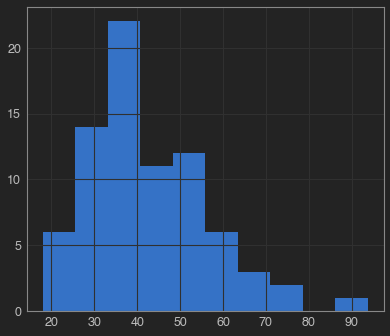

In [40]:
cereal.rating.hist()

In [42]:
cereal['rating'] = pd.cut(cereal['rating'], bins=3,labels=[0,1,2]) #bins itu motong ratingnya jadi berapa, labels itu untuk mengubah pengelompokkan nya dengan label yang diinginkan, bisa string/integer tsb
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,0,70,4,1,130,10.0,5.0,6.0,280.00,fda_25,3,1.0,0.33,1
1,100% Natural Bran,Q,0,120,3,5,15,2.0,8.0,8.0,135.00,fda_0,3,1.0,1.00,0
2,All-Bran,K,0,70,4,1,260,9.0,7.0,5.0,320.00,fda_25,3,1.0,0.33,1
3,All-Bran with Extra Fiber,K,0,50,4,0,140,14.0,8.0,0.0,330.00,fda_25,3,1.0,0.50,2
4,Almond Delight,R,0,110,2,2,200,1.0,14.0,8.0,98.67,fda_25,3,1.0,0.75,0


In [43]:
# CROSSTAB + COUNT
pd.crosstab(cereal.rating,cereal.type)

type,0,1
rating,,
0,47,0
1,24,3
2,3,0


In [44]:
# CROSSTAB + persentase
pd.crosstab(cereal.rating,cereal.type, normalize='index')

type,0,1
rating,,
0,1.000000,0.000000
1,0.888889,0.111111
2,1.000000,0.000000


# SCALING
biasanya dipakai untuk algoritma yang berbasis distance , bukan tree based. Scaling umumnya berarti mengubah rentang nilai tanpa mengubah isi data asli. Sebagai contoh price rentang jarak yg besar sekali dibandingkan dengan jumlah kamar tidur. Sehingga akan menimbulkan hasil yang tidak informatif apabila dibandingkan. Terlebih lagi bila menggunakan algoritma yang distance base. Maka dari itu dengan scaling dapat membantu kedua kolom tersebut untuk memiliki rentang nilai yang sama. Range nya ada pada 0 sampai 1. Kenapa saya pake scaling? karena machine learning diharapkan akan berkinerja lebih baik atau beraver lebih cepat ketika fitur berada pada skala yang relatif mirip yang mempermudah model mencerna isinya.

-standard scaler

-minmax scaler

-robust scaler

In [45]:
from luwiji.feature_scaling import illustration,demo

### CONTOH : SCALING KASUS REGRESI

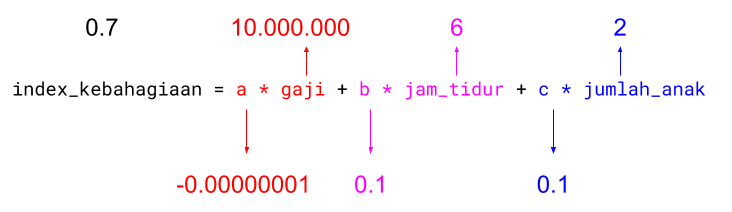

In [46]:
illustration.coef_balance

Apabila dilihat koefisiennya (a,b,c) untuk mendapatkan index_kebahagiaan = 0,7. Gaji memiliki skala yang jauh dibandingkan jam_tidur dan jumlah_anak. Maka dari itu harus disamakan skala pada fitur-fitur tersebut dengan Scaling

-- STANDARD SCALER --
cara kerja:
- Geser data agar rata-rata menjadi 0, kemudian membagi dengan standar deviasi supaya std = 1
- Note : Data akan menjadi == mean = 0, std = 1
- Standard Scaler sangat bagus untuk data yang sudah terdistribusi normal, tidak bisa membantu saat data miring/skew
- Apabila ingin menggunakan Standard Scaler pada data tdk terdistribusi normal, maka harus dilakukan Power Transformation(dipangkat 0 koma) dulu baru di Standard Scaler


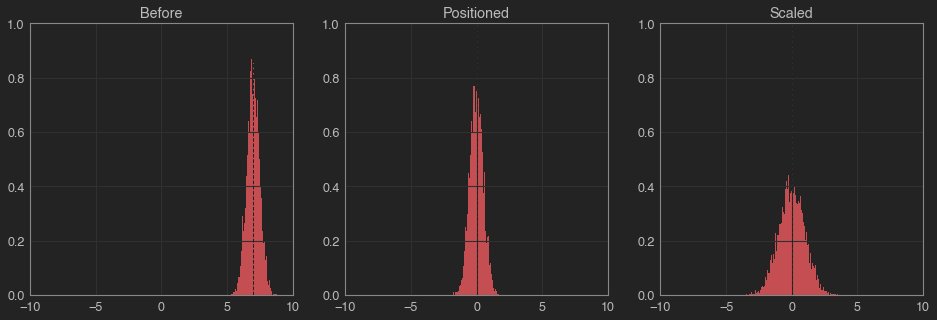

In [48]:
demo.standard_scaler()

Prosesnya bisa dilihat dari Before, Positioned, Scaled

-- MIN MAX SCALER -- cara kerja:

- Geser nilai minimum ke nilai 0, kemudian memampatkan data tinggi sedemikian rupa sehingga nilai Max = 1
- Angka lain akan menjadi sesuai skala
- Kelemahan : ketika data baru nilainya diatas nilai max atau dibawah nilai min yaitu data memiliki Outliers



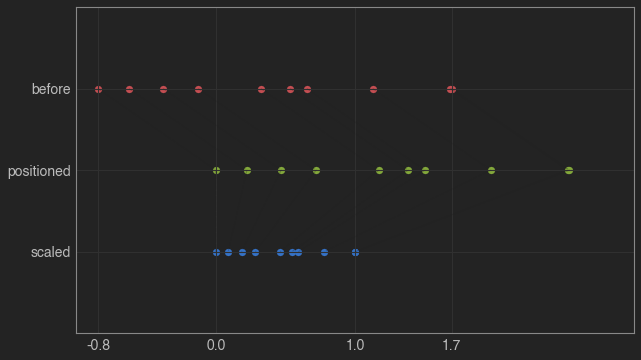

In [51]:
demo.minmax_scaler()

-- ROBUST SCALER -- cara kerja:

- Memampatkan data sedemikian rupa tapi menggunakan quantile sehingga tidak berpengaruh terhadap Outliers

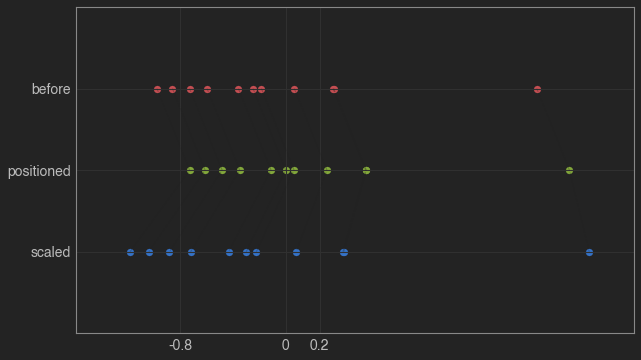

In [52]:
demo.robust_scaler()

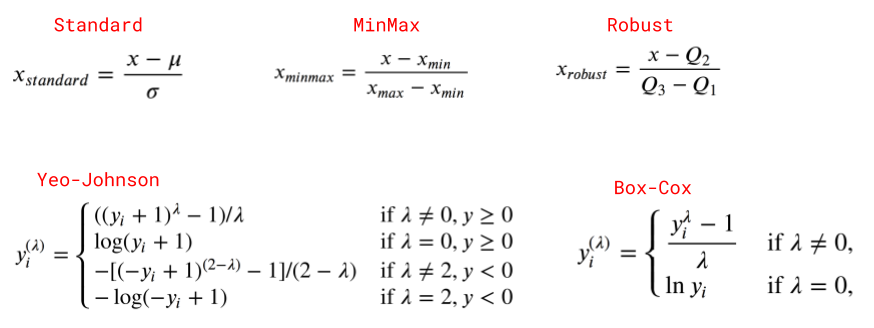

In [53]:
illustration.formula

- RUMUS STANDARD SCALER : data - rata2 / std
- RUMUS MINMAX : data - min/ min - max
- RUMUS ROBUST : data - Q2/ Q3-Q1
- RUMUS Yeo-Johnson dan Box-Cox intinya mencari nilai pangkat terbaik

In [58]:
from luwiji.regularized_regression import illustration, demo

# REGULARIZATION
pemberian penalty --> bobot

membuat balance koefisien agar tidak terjadi overfit / mengurangi error

- Lasso/L1/Sparsity   : ngasih punishment ke koefisien dengan alpha yang memiliki range 0 - 1 dan dengan degree/memangkatkan. Akibatnya koefisien menjadi bertambah kecil hingga bisa habis(biasanya untuk Feature Selection)
- Ridge/L2/Simplicity : ngasih punishment ke koefisien tetapi tidak sekuat L1, Akibatnya koefisien menjadi bertambah kecil(biasanya untuk feature selection jika fiturnya sedikit)
- Elastic Net : gabungan lasso dan ridge

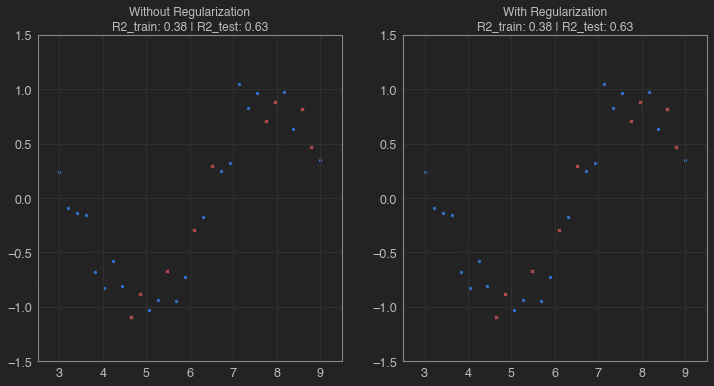

In [61]:
demo.ridge_lasso()

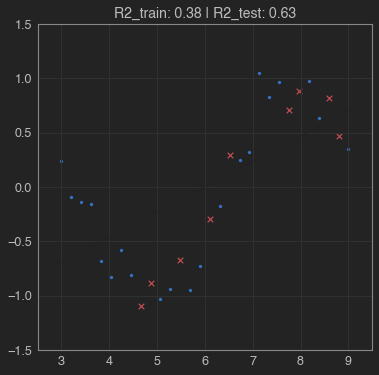

In [62]:
demo.elastic_net()

# POWER TRANSFORMER

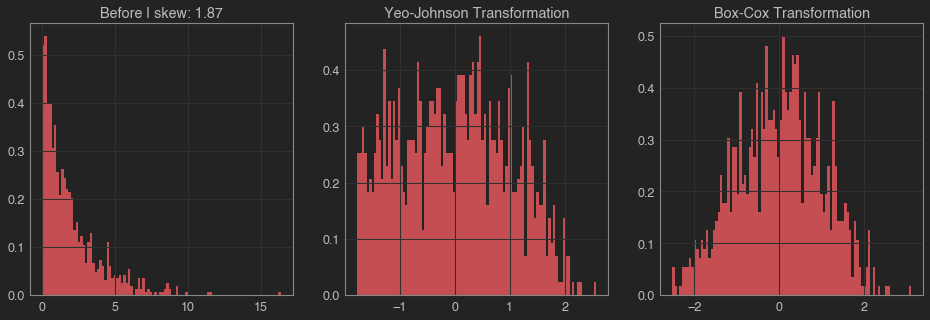

In [50]:
demo.power_transformer()